# The Loss Function for Logistic Regression 

## 1. Uncertainty

In [1]:
import numpy as np
from PIL import Image

#### Q: How many bytes do we need to store a 200x200 B/W image?

* bit = 0 or 1
* byte = 8 bits
* 200 * 200 bits or that / 8 bytes

In [3]:
X = np.random.randint(0, 256, size=(200, 200), dtype=np.uint8) # <-- single byte

In [4]:
X[X<=127] = 0
X[X>127] = 1

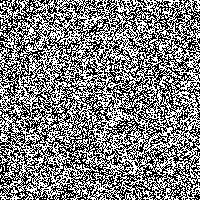

In [5]:
im = Image.fromarray(X * 255)
im

In [6]:
im.save('blur.png')

In [8]:
! ls -l *.png

-rw-r--r-- 1 mmuratardag mmuratardag 8823 Jan 22 10:14 blur.png


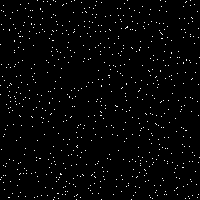

In [9]:
X = np.random.randint(0, 256, size=(200, 200), dtype=np.uint8)
X[X<=250] = 0
X[X>250] = 1
im = Image.fromarray(X * 255)
im

In [10]:
im.save('sparse.png')

In [11]:
! ls -l *.png

-rw-r--r-- 1 mmuratardag mmuratardag 8823 Jan 22 10:14 blur.png
-rw-r--r-- 1 mmuratardag mmuratardag 1400 Jan 22 10:19 sparse.png


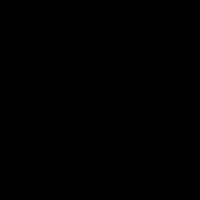

In [12]:
X = np.random.randint(0, 256, size=(200, 200), dtype=np.uint8)
X[X<=2500] = 0
X[X>2500] = 1
im = Image.fromarray(X * 255)
im

### We measure uncertainty by how well the data can be compressed

## 2. Information Entropy

**aka Shannon Entropy**

*a measure for uncertainty in data (your target variable)*

$H(y) = -\sum_i p(y_i) * log_2(p(y_i))$

The entropy H(y) tells us how much uncertainty there is.

The Unit of H are **bits**

In [14]:
from math import log

p_gentoo = 0.01
p_adelie = 0.99

-( p_gentoo * log(p_gentoo, 2) + p_adelie * log(p_adelie, 2))

0.08079313589591118

In [15]:
p_gentoo = 0.000001
p_adelie = 0.999999

-( p_gentoo * log(p_gentoo, 2) + p_adelie * log(p_adelie, 2))

2.137426288890686e-05

In [16]:
p_gentoo = 0.5
p_adelie = 0.5

-( p_gentoo * log(p_gentoo, 2) + p_adelie * log(p_adelie, 2))

1.0

### What are we trying to do when training a model?

* there exists a real probability distribution Q(y) of the target
* unpleasant fact: we don't know Q(y)
* we try to get as close to Q(y) with our model P(y)

can we measure how close we are to the real distribution/uncertainty?

we can calculate the difference

$P(y) - Q(y)$

for a **sample** of Q(y). The sample is our training data.

![](oss.png)

## 3. Measuring Errors of a LogReg model

**we want the equivalent of MSE for logistic regression**

* floating-point number
* differentiable, so we can optimize it
* quantifies the residual uncertainty for our training sample
* smaller is better

$log loss = -\sum y_T * log(\hat p) + (1-y_T) * log(1-\hat p)$

LogLoss or binary cross-entropy

$y_T$ - the real target label (0 or 1)

$\hat p$ - the probability from our model

In [17]:
# model probs
p_hat = [0.01, 0.99, 0.5, 0.7999]  # <-- m.predict(Xtrain)
y_true = [0.0, 1.00, 1.0, 0.00]    # <-- ytrain

In [22]:
#TODO: implement the log-loss equation

# p_hat = np.array(p_hat)
# y_true = np.array(y_true)

# np.sum( - (y_true*log(p_hat,2) + (1-y_true) * log(1-p_hat)) )

TypeError: only size-1 arrays can be converted to Python scalars

In [26]:
def LogLoss (p_hat, y_true):
    return -(y_true*np.log(p_hat)+(1-y_true)*np.log(1-p_hat)).sum()
p_hat = np.array([0.01, 0.99, 0.5, 0.7999])
y_true = np.array([0.0, 1.00, 1.0, 0.00])
- round(LogLoss(p_hat,y_true),2)

-2.32

**Logistic Regression** is running an algorithm called Gradient Descent
that finds the parameters giving the minimum log-loss for a sample.

**Note:** there is always one minimum (unless your data is multi-colinear)

### Also see:

* Kullback-Leibler Divergence
* maximum likelihood (alternative way to explain logloss)
* AIC (Akaike Information Criterion) - for comparing models